In [114]:
# Notebook to simulate the electric field away from a sharp conducting STM tip
# Electric field has units V/m, so given an electrode biased at a voltage V the E field at a certain distance can be found
# by dividing by seperation distance d

# Import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [115]:
def generateDseries(distance):
    """Generate series of x coordinates starting from STM tip (d=0)
        Default unit is angstrom or nanometres?

    Args:
        distance (float): Maximum distance to calculate field from [nm]
    Returns
        d_series (float): Series of successive distances in units of [m]
    """
    distance_m = distance / 1e9
    d_series = np.linspace(0, distance_m, 1000)
    return d_series

In [116]:
def generateE(V, d_series):
    """Generates a value of electric field at each distance away from the STM tip 
        Should decay asympotically
        Find E in units of V/cm

    Args:
        V (float): Voltage at which STM bias is set
        d_series (float): Distance from STM tip in units of [m]
    Returns:
        E_series (float): Returns E field in V/cm
    """
    E_series = []
    
    for distance in d_series:
        E_field = V / (distance*100)
        E_series.append(E_field)
        
    return E_series

def generateEnergy(E_series_cm):
    """Calculate Energy per unit volume at point in a dielectric using 1/2 * epsilon_0 * |E|**2

    Args:
        E_series_cm (float): Electric field in units of V/cm

    Returns:
        Energy_series: Energy per unit volume at point in space due to E field
    """
    Energy_series = []
    epsilon_0 = 8.85e-12
    
    for E_field in E_series_cm: # convert to V/m for energy calculation
        E_field = E_field * 100
        energy = 0.5 * epsilon_0 * E_field**2
        Energy_series.append(energy)
    
    return Energy_series
    

In [122]:
# Plot E against d
# Generate data
# distance = 100  # example distance
# V = 4  # example voltage
# d_series = generateDseries(distance)
# E_series = generateE(V, d_series)


def plotE(distance_nm):
   
   # Plotting
    plt.figure(figsize=(10, 6))
   
    V_values = np.linspace(1, 8, 8)
    for V in V_values:  
        d_series = generateDseries(distance_nm)
        E_series = generateE(V, d_series)
        plt.plot(d_series*1e9, E_series, label=f'V = {V}V')
        
    plt.axhline(y=1e8, color='r', linestyle='--', linewidth=1, label='Breakdown threshold of SnSe')  # Customize color, style, and width as needed
    plt.vlines(0.5,0,1e9, label='Typical tip-sample distance', colors='black')
    plt.xlabel('Distance (d) [nm]')
    plt.ylabel('Electric Field (E) [V/cm]')
    plt.title('Electric Field vs Distance from STM Tip')
    plt.legend()
    plt.grid(True)
    plt.ylim(0, 0.2e9)
    plt.show()
    
def plotEnergyDensity(distance_nm):
   
   # Plotting
    plt.figure(figsize=(10, 6))
   
    V_values = np.linspace(1, 8, 8)
    for V in V_values:  
        d_series = generateDseries(distance_nm)
        E_series = generateE(V, d_series)
        Energy_series = generateEnergy(E_series)
        plt.plot(d_series*1e9, Energy_series, label=f'V = {V}V')
        
    # plt.axhline(y=1e8, color='r', linestyle='--', linewidth=1)  # Customize color, style, and width as needed
    # plt.vlines(0.5,0,1e9, label='Typical tip-sample distance', colors='black')
    plt.xlabel('Distance (d) [nm]')
    plt.ylabel('Energy density (E) [J/m^3]')
    plt.title('Energy density vs Distance from STM Tip') # - $\frac{1}{2} \epsilon_0 |\textbf{E}|^2$')
    plt.legend()
    plt.grid(True)
    plt.ylim(0, 0.2e9)
    plt.show()

/var/folders/j0/4jbn0h55721bgq7ld4mp7qjw0000gn/T/ipykernel_72852/756916639.py:15: RuntimeWarning: divide by zero encountered in double_scalars
  E_field = V / (distance*100)
/var/folders/j0/4jbn0h55721bgq7ld4mp7qjw0000gn/T/ipykernel_72852/756916639.py:15: RuntimeWarning: divide by zero encountered in double_scalars
  E_field = V / (distance*100)
/var/folders/j0/4jbn0h55721bgq7ld4mp7qjw0000gn/T/ipykernel_72852/756916639.py:15: RuntimeWarning: divide by zero encountered in double_scalars
  E_field = V / (distance*100)
/var/folders/j0/4jbn0h55721bgq7ld4mp7qjw0000gn/T/ipykernel_72852/756916639.py:15: RuntimeWarning: divide by zero encountered in double_scalars
  E_field = V / (distance*100)
/var/folders/j0/4jbn0h55721bgq7ld4mp7qjw0000gn/T/ipykernel_72852/756916639.py:15: RuntimeWarning: divide by zero encountered in double_scalars
  E_field = V / (distance*100)
/var/folders/j0/4jbn0h55721bgq7ld4mp7qjw0000gn/T/ipykernel_72852/756916639.py:15: RuntimeWarning: divide by zero encountered in do

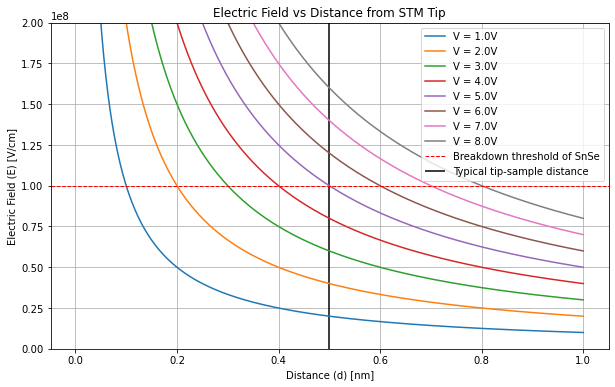

In [123]:
plotE(1)

/var/folders/j0/4jbn0h55721bgq7ld4mp7qjw0000gn/T/ipykernel_72852/756916639.py:15: RuntimeWarning: divide by zero encountered in double_scalars
  E_field = V / (distance*100)
/var/folders/j0/4jbn0h55721bgq7ld4mp7qjw0000gn/T/ipykernel_72852/756916639.py:15: RuntimeWarning: divide by zero encountered in double_scalars
  E_field = V / (distance*100)
/var/folders/j0/4jbn0h55721bgq7ld4mp7qjw0000gn/T/ipykernel_72852/756916639.py:15: RuntimeWarning: divide by zero encountered in double_scalars
  E_field = V / (distance*100)
/var/folders/j0/4jbn0h55721bgq7ld4mp7qjw0000gn/T/ipykernel_72852/756916639.py:15: RuntimeWarning: divide by zero encountered in double_scalars
  E_field = V / (distance*100)
/var/folders/j0/4jbn0h55721bgq7ld4mp7qjw0000gn/T/ipykernel_72852/756916639.py:15: RuntimeWarning: divide by zero encountered in double_scalars
  E_field = V / (distance*100)
/var/folders/j0/4jbn0h55721bgq7ld4mp7qjw0000gn/T/ipykernel_72852/756916639.py:15: RuntimeWarning: divide by zero encountered in do

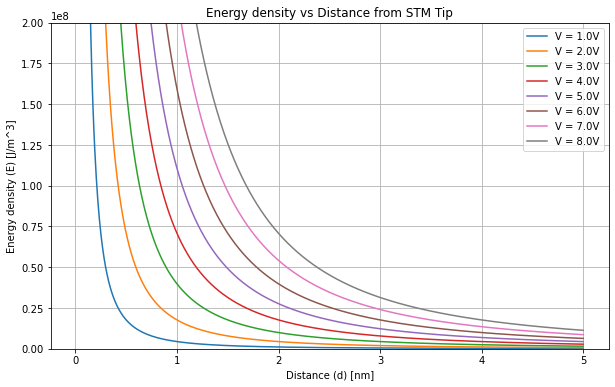

In [119]:
plotEnergyDensity(5)